# Which attack type choose to kill the biggest ammount of people in one attack?

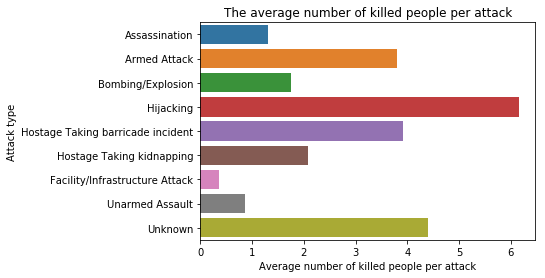

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_terrorism = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', usecols=[1,2,7,8,9,13,14,16,26,27,28,34,68,69,71,81,98,100,101,103,104,105])


nr_attacktype1 = np.asarray(data_terrorism.groupby('attacktype1').attacktype1.count())
nkill_attacktype1 = np.asarray(data_terrorism.groupby('attacktype1').nkill.sum())
average_nkill = np.divide(nkill_attacktype1, nr_attacktype1) 

attacktype1_names = np.array(['Assassination','Armed Attack','Bombing/Explosion','Hijacking','Hostage Taking barricade incident','Hostage Taking kidnapping','Facility/Infrastructure Attack','Unarmed Assault','Unknown'])


total_deaths = sum(nkill_attacktype1)
average_nkill2 = np.divide(nkill_attacktype1, total_deaths) 
average_nkill_kills = average_nkill2*100

nwound_attacktype1 = np.asarray(data_terrorism.groupby('attacktype1').nwound.sum())
average_nwound = np.divide(nwound_attacktype1, nr_attacktype1) 

total_wounded = sum(nwound_attacktype1)
average_nwound2 = np.divide(nwound_attacktype1, total_wounded) 
average_nwound_wounded = average_nwound2*100

propextent_attacktype1 = np.asarray(data_terrorism.groupby('attacktype1').propextent.sum())
average_propextent = np.divide(propextent_attacktype1, nr_attacktype1) 
total_property = sum(propextent_attacktype1)
average_propextent2 = np.divide(propextent_attacktype1, total_property) 
average_propextent_propextent = average_propextent2*100

attacktype_data = pd.DataFrame({"attacktype1_names":attacktype1_names,"nr_attacktype1":nr_attacktype1,"nkill_attacktype1":nkill_attacktype1,"average_nkill":average_nkill, "average_nkill_kills":average_nkill_kills})

ax = sns.barplot(y='attacktype1_names',x='average_nkill', data=attacktype_data)
ax.set_xlabel("Average number of killed people per attack")
ax.set_ylabel("Attack type")

ax.set_title("The average number of killed people per attack")

plt.show()



# What is the number of successfully finished  attacks in Western and Eastern Europe?

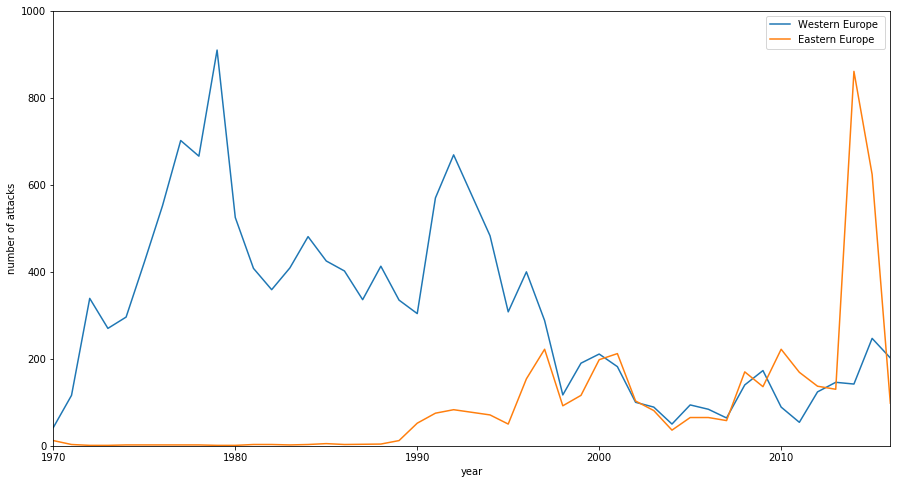

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)

region_dictionary = {8: 'Western Europe', 9: 'Eastern Europe'}

def multi_graph(result,result_list, xmin, xmax, ymin, ymax):
    fig2, ax2 = plt.subplots(figsize = (15,8))
    number = 8 
    for j in result_list:
        ax2.plot(j.index, j.eventid, label = '%s ' % region_dictionary[number] )
        number += 1

    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('year')
    plt.ylabel('number of attacks')
    ax2.legend(loc = 0)


success_list = []


region_data = data[(data.region == 8)]
region_data_success = region_data[(region_data.success == 1)]
region_grouped_success = region_data_success.groupby('iyear').count()

    
success_list.append(region_grouped_success)

region_data = data[(data.region == 9)]
region_data_success = region_data[(region_data.success == 1)]
region_grouped_success = region_data_success.groupby('iyear').count()

    
success_list.append(region_grouped_success)

multi_graph('Successes',success_list, 1970, 2016, 0, 1000)


plt.show()

# Which season terrorists like the most?

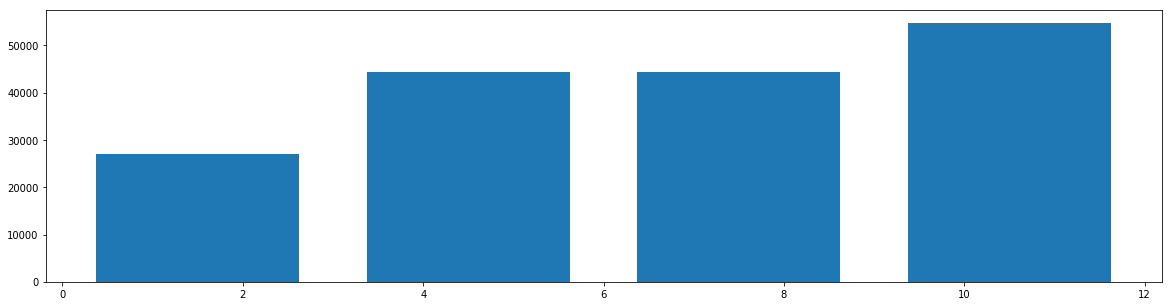

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)
month=df['imonth']
#assumption: 1st-3rd month - winter, 4th-6th - spring, 7th-9th - summer, 10th-12th - fall, not specific dates
plt.figure(figsize=(20,5))
plt.hist(month, rwidth=0.75, bins=4)
plt.show()
# result: the most popular season is autumn

# How many terrorist attacks take place in each year?

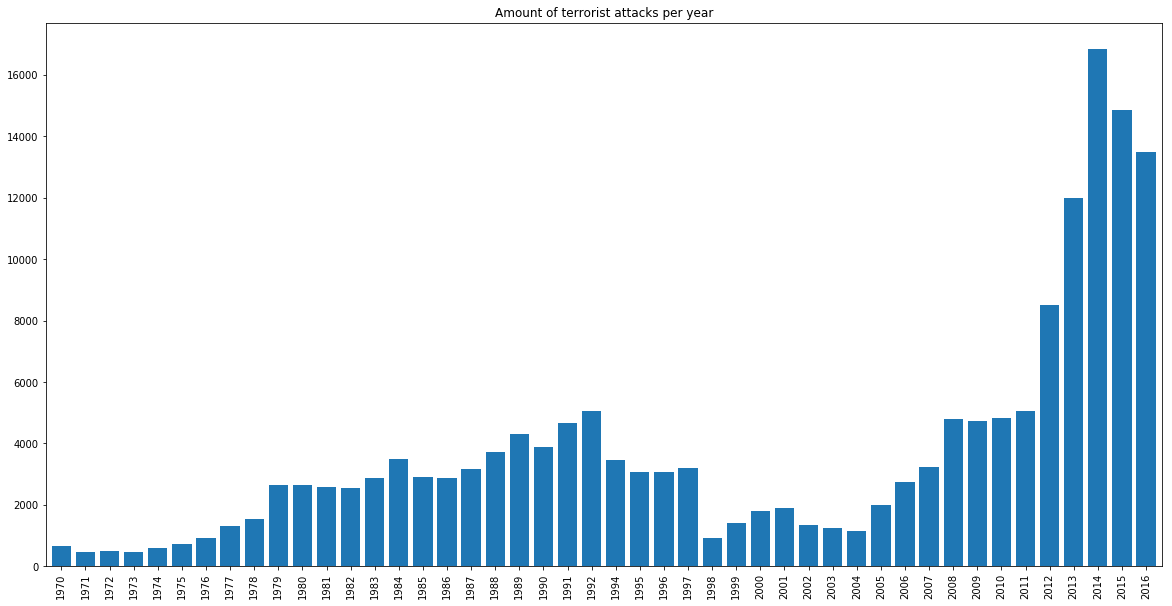

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



df = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)

arplot = pd.value_counts(df['iyear']).sort_index().plot.bar(width=0.8, figsize=(20, 10), title="Amount of terrorist attacks per year")

plt.show()

#result: nope

# How many terrorist attacks take place in each region?

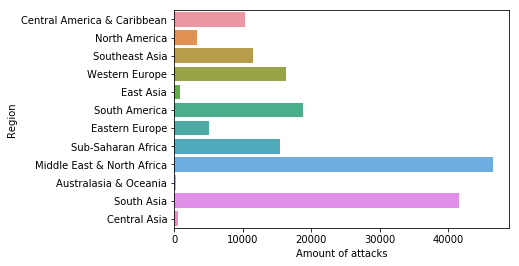

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)
place=df['region_txt']
ax = sns.countplot(y="region_txt", data=df)
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("Region")
plt.show()
